In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [23]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [5]:
df = pd.read_csv('Mall_Customers_Data.csv', usecols=['Annual Income (k$)', 'Spending Score (1-100)'])

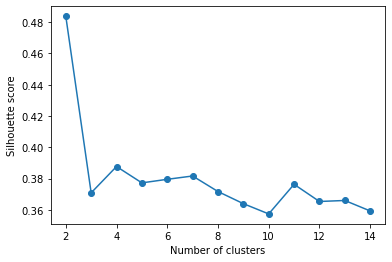

In [6]:
silhouette_scores = []
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    cluster_labels = kmeans.predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

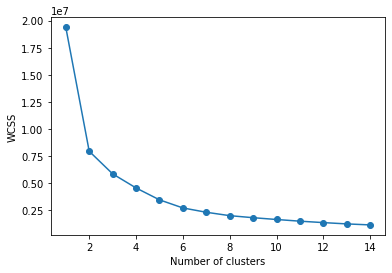

In [7]:
wcss = []
for n_clusters in range(1, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

FROM SCRATH


In [15]:
def agglomerative_clustering(X, n_clusters):
    n_samples = X.shape[0]
    labels = np.arange(n_samples)
    distances = _pairwise_distances(X)
    for i in range(n_samples - n_clusters):
        i, j = np.unravel_index(np.argmin(distances), distances.shape)
        labels = _merge(labels, i, j)
        distances = _update_distances(distances, labels, i, j)
    return labels

In [16]:
def _pairwise_distances(X):
    n_samples = X.shape[0]
    distances = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            distances[i, j] = np.sqrt(np.sum((X[i] - X[j])**2))
    return distances

In [17]:
def _merge(labels, i, j):
    mask = labels == labels[j]
    labels[mask] = labels[i]
    return labels


In [18]:
def _update_distances(distances, labels, i, j):
    mask = np.logical_or(labels == labels[i], labels == labels[j])
    not_mask = np.logical_not(mask)
    distances_ij = distances[mask][:, not_mask]
    min_distances = np.min(distances_ij, axis=0)
    distances[i, not_mask] = min_distances
    distances[not_mask, i] = min_distances
    distances = np.delete(distances, j, axis=0)
    distances = np.delete(distances, j, axis=1)
    labels = np.delete(labels, j)
    return distances

In [20]:
df = pd.read_csv("Mall_Customers_Data.csv")[["Annual Income (k$)", "Spending Score (1-100)"]].values

In [28]:
n_clusters=2

In [ ]:
labels = agglomerative_clustering(df, n_clusters)

USING LIBRARIES

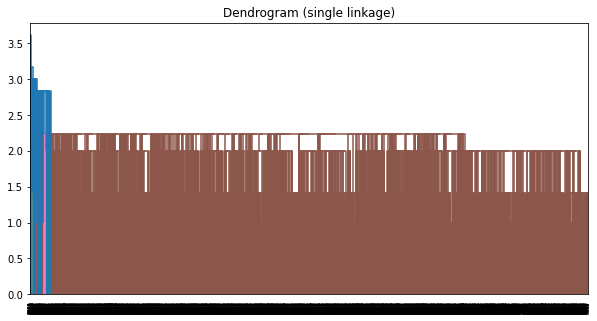

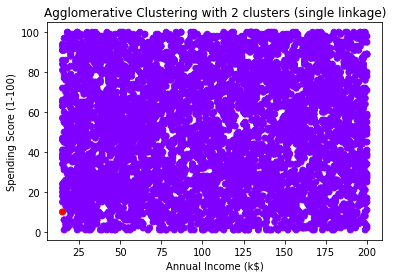

In [29]:
agc = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
labels = agc.fit_predict(df)

Z = linkage(df, method='single')
plt.figure(figsize=(10, 5))
plt.title(f"Dendrogram (single linkage)")
dendrogram(Z)
plt.show()


plt.scatter(df[:, 0], df[:, 1], c=labels, cmap='rainbow')
plt.title(f"Agglomerative Clustering with {n_clusters} clusters (single linkage)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

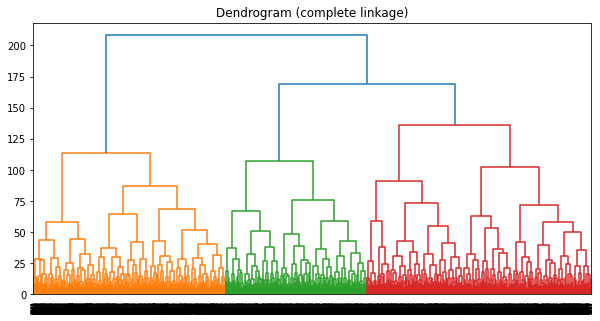

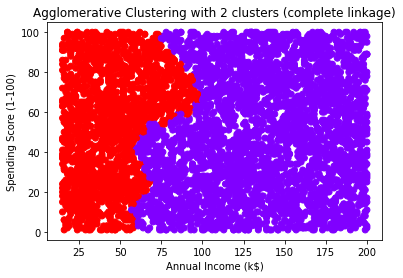

In [30]:
agc = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
labels = agc.fit_predict(df)

Z = linkage(df, method='complete')
plt.figure(figsize=(10, 5))
plt.title(f"Dendrogram (complete linkage)")
dendrogram(Z)
plt.show()


plt.scatter(df[:, 0], df[:, 1], c=labels, cmap='rainbow')
plt.title(f"Agglomerative Clustering with {n_clusters} clusters (complete linkage)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

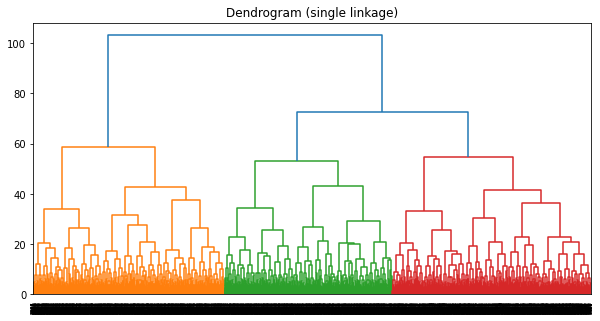

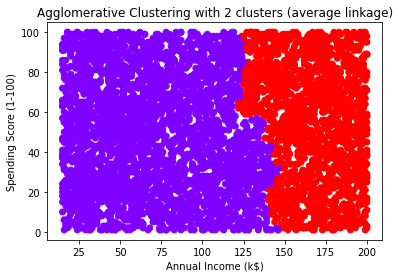

In [31]:
agc = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
labels = agc.fit_predict(df)

Z = linkage(df, method='average')
plt.figure(figsize=(10, 5))
plt.title(f"Dendrogram (single linkage)")
dendrogram(Z)
plt.show()


plt.scatter(df[:, 0], df[:, 1], c=labels, cmap='rainbow')
plt.title(f"Agglomerative Clustering with {n_clusters} clusters (average linkage)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()